In [4]:
#Regularized logistic regression

In [10]:
#importing necessary library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [11]:
#loading the data file
data=pd.read_csv("C:\\Users\\inspiron\\Documents\\ex2data2.txt",header=None)
x=data.iloc[:,0:2]
y=data.iloc[:,2]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


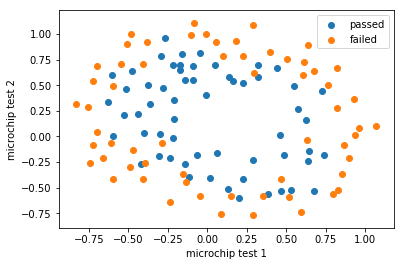

In [12]:
#plotting the data

#masking (for plotting two different variables)

mask=y==1
passed=plt.scatter(x[mask][0].values,x[mask][1].values)
failed=plt.scatter(x[~mask][0].values,x[~mask][1].values)
plt.xlabel('microchip test 1')
plt.ylabel('microchip test 2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [34]:
#mapfeaturing
#done so that a more accurate decision boundary can be made 
#2 features will not be sufficient as a linear boundary is not required here

def mapFeature(x1,x2):      
    degree=6                                
    out=np.ones(x.shape[0])[:,np.newaxis]
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,np.multiply(np.power(x1,i-j),np.power(x2,j))[:,np.newaxis]))          
    return out
x=mapFeature(x.iloc[:,0],x.iloc[:,1])

In [38]:
x

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [27]:
#setting the parameters
lamda=1
(m,n)=x.shape
theta=np.zeros((n,1))
y=y[:,np.newaxis]

In [39]:
#defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [40]:
#defining Regularized Cost Function
def reg_costFunc(theta, x, y, lamda):
    m=len(y)
    j=(-1/m)*(y.T @ np.log(sigmoid(x@ theta)) + (1 - y.T) @ np.log(1 - sigmoid(x@ theta)))#this is different from earlier cost 
                                                                                          #besause in this case we have to 
                                                                                          #create the result in the form of an
                                                                                          #array so that it can be added to
                                                                                          #regularization term
    reg=(lamda/(2*m))*(theta[1:].T @ theta[1:])
    j=j+reg
    return j

j=reg_costFunc(theta, x, y, lamda)
print(j)

[[0.52900273]]


In [41]:
#defining Gradient Descent Function
def lrGradientDescent(theta, x, y, labda):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * x.T @ (sigmoid(x @ theta) - y)
    grad[1:] = grad[1:] + (lamda / m) * theta[1:]
    return grad

In [42]:
#Learning parameters using fmin_tnc
output = opt.fmin_tnc(func = reg_costFunc, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (x, y.flatten(), lamda))
theta = output[0]

print(theta)

print("\n")

j=reg_costFunc(theta, x, y, lamda)    
print(j)

[ 1.27273834  0.62527208  1.18108752 -2.01995903 -0.91742836 -1.43166197
  0.12398098 -0.36553476 -0.35724832 -0.17513043 -1.45814442 -0.05098716
 -0.61555482 -0.27470373 -1.19283249 -0.24217867 -0.20601667 -0.04469701
 -0.27778465 -0.29538671 -0.45635611 -1.04319845  0.02778263 -0.29243597
  0.0155618  -0.32739002 -0.1438903  -0.92463469]


[[0.52900273]]


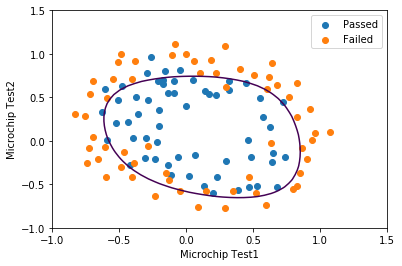

In [43]:
# making decision boundary

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(x1, x2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(x1, i-j), np.power(x2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(mapFeatureForPlotting(u[i],v[j]),theta)

mask = y.flatten() == 1
x = data.iloc[:,:-1]
passed = plt.scatter(x[mask][0], x[mask][1])
failed = plt.scatter(x[~mask][0], x[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()
